## Polars home page (https://pola.rs/) 
## The User Guide home page (https://docs.pola.rs/)

#Installation

pip install polars

In [1]:
from polars_transmission_model import run_SEIR_model_pl, plot_SEIR_pl, Params
from pandas_transmission_model import run_SEIR_model_pd, plot_SEIR_pd
import time
import polars as pl
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import os,sys
from pathlib import Path

#repo_path = __file__#"."
#repo_path = os.path.dirname(os.path.abspath(os.path.join(repo_path)))
#os.chdir(os.path.join(repo_path))

In [2]:
# Parameters
params = Params(
    no_runs=10,
    pop_size=5000,
    inf_duration=10, 
    exposed_duration=4,
    random_seed=5,
    transmission_rate=0.02,
    time_horizon=50,
    time_step=0.5,
    record_transmission=True,
    record_all_new_cases=True
)

In [3]:
pop_sizes = [500, 5000, 50000, 500000]
polars_exec_times = []
pandas_exec_time = []

for pop_size in pop_sizes:
    setattr(params, 'pop_size', pop_size)  
    # get the start time
    st = time.time()
    results_pl = run_SEIR_model_pl(params)
    # get the end time
    et = time.time()
    # get the execution time
    elapsed_time_pl = et - st
    polars_exec_times.append(elapsed_time_pl)
    print('Pop size', pop_size,' - Polars execution time:', round(elapsed_time_pl, 1), 'seconds')   

    # get the start time
    st = time.time()
    results_pd = run_SEIR_model_pd(params)
    # get the end time
    et = time.time()
    # get the execution time
    elapsed_time_pd = et - st
    pandas_exec_time.append(elapsed_time_pd)
    print('Pop size', pop_size,' - Pandas execution time:', round(elapsed_time_pd, 1), 'seconds')   

Pop size 500  - Polars execution time: 1.5 seconds
Pop size 500  - Pandas execution time: 1.5 seconds
Pop size 5000  - Polars execution time: 1.9 seconds
Pop size 5000  - Pandas execution time: 3.9 seconds
Pop size 50000  - Polars execution time: 4.5 seconds
Pop size 50000  - Pandas execution time: 28.0 seconds
Pop size 500000  - Polars execution time: 24.7 seconds
Pop size 500000  - Pandas execution time: 275.5 seconds


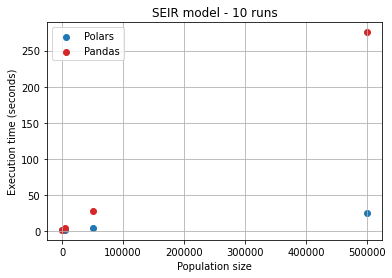

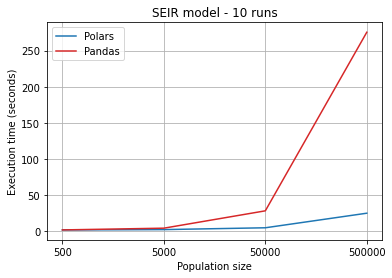

In [4]:
fig_size = (6, 4)
fig, ax = plt.subplots(figsize = fig_size)

plt.scatter(pop_sizes[:], polars_exec_times[:], color="tab:blue", label="Polars")
plt.scatter(pop_sizes[:], pandas_exec_time[:], color="tab:red", label="Pandas")

plt.xlabel("Population size")
plt.ylabel("Execution time (seconds)")
plt.title("SEIR model - %s runs"%params.no_runs)
plt.grid()

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

plt.show()
fig.savefig('output/exec_time_v0.tiff', bbox_inches="tight", dpi=300)

fig, ax = plt.subplots(figsize = fig_size)

plt.plot([str(size) for size in pop_sizes], polars_exec_times, color="tab:blue", label="Polars")
plt.plot([str(size) for size in pop_sizes], pandas_exec_time, color="tab:red", label="Pandas")
#ax.set_yscale('log')
#plt.yscale('log',base=10) 

plt.xlabel("Population size")
plt.ylabel("Execution time (seconds)")
plt.title("SEIR model - %s runs"%params.no_runs)
plt.grid()

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

plt.show()
fig.savefig('output/exec_time.tiff', bbox_inches="tight", dpi=300)

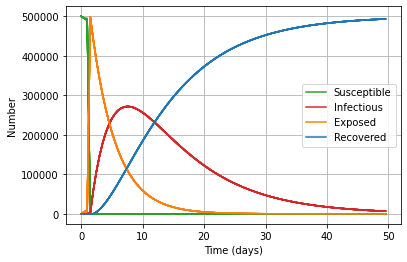

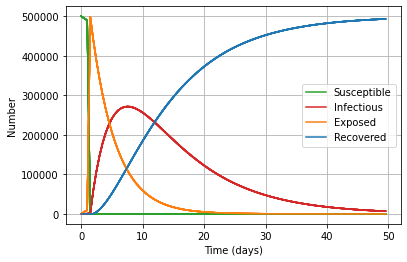

In [5]:
#plot results
plot_SEIR_pl(results_pl["all_transmission"], fig_size)
plot_SEIR_pd(results_pd["all_transmission"], fig_size)